In [16]:
import numpy as np
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from xgboost import XGBRegressor

In [3]:
data_full = pd.read_csv("data/train.csv")
data_full.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.plotting.register_matplotlib_converters()

<AxesSubplot:>

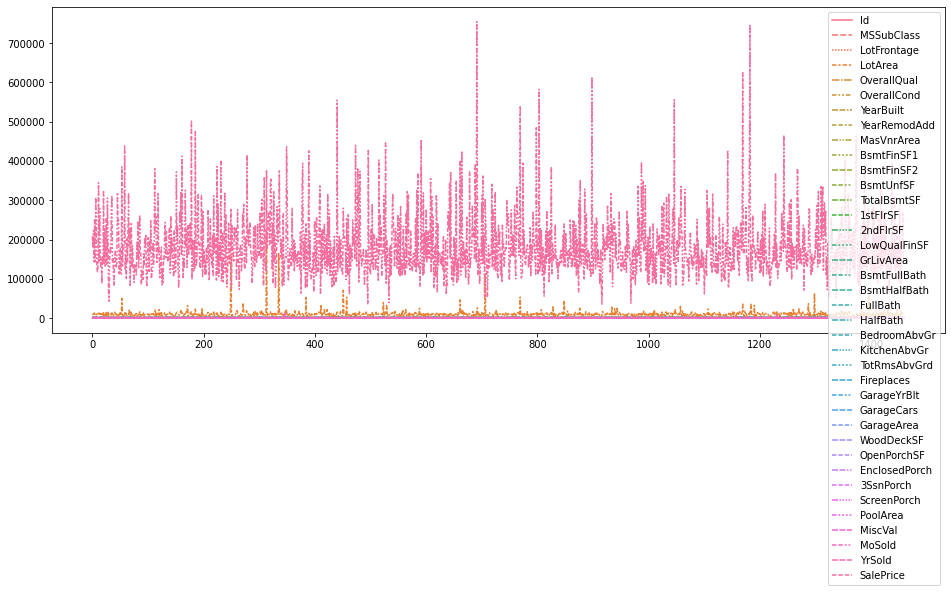

In [5]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data_full)


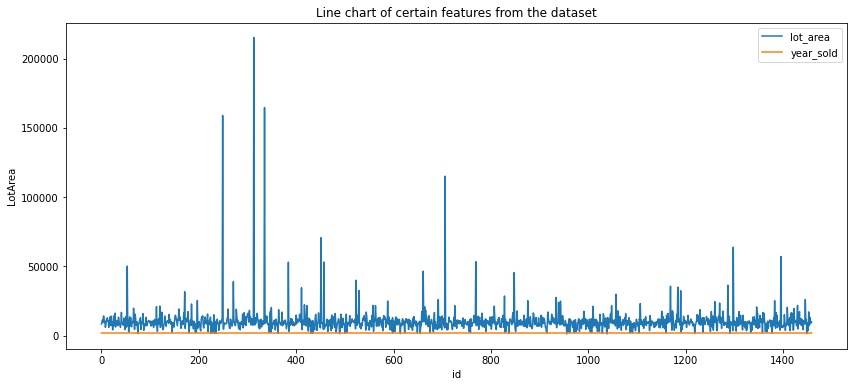

In [6]:
plt.figure(figsize=(14,6))

plt.title("Line chart of certain features from the dataset")

sns.lineplot(data=data_full["LotArea"], label="lot_area")
sns.lineplot(data=data_full["YrSold"], label="year_sold")

plt.xlabel("id")
plt.show()


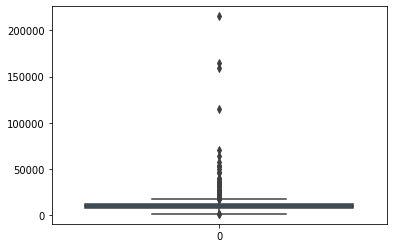

In [9]:
sns.boxplot(data=data_full["LotArea"])
plt.show()

In [110]:
data_full.shape

(1460, 81)

<AxesSubplot:ylabel='YrSold'>

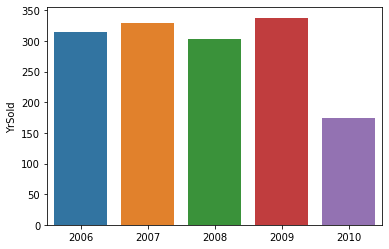

In [130]:
sns.barplot(x=np.unique(data_full["YrSold"].sort_index()), y=data_full["YrSold"].value_counts().sort_index())

In [ ]:
sns.histplot(data=data_full["YrSold"], kde=False)
# plt.hist(data_full["YrSold"])

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

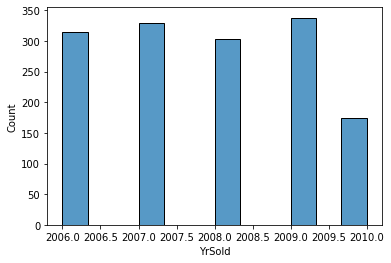

In [138]:
sns.barplot(x=np.unique(data_full["MoSold"].sort_index()), y=data_full["MoSold"].value_counts().sort_index())


<AxesSubplot:ylabel='MoSold'>

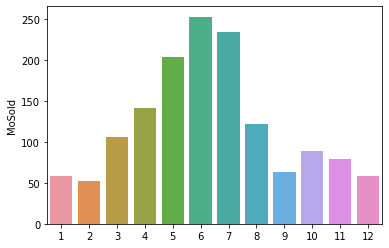

In [126]:
sns.barplot(x=np.unique(data_full["MoSold"].sort_index()), y=data_full["MoSold"].value_counts().sort_index())


In [105]:
years_and_months = data_full[["YrSold", "MoSold"]]
count_data = pd.DataFrame(years_and_months.groupby(["MoSold", 'YrSold']).size()).rename({"0":"count"})
reset_count = count_data.reset_index()
dataset = pd.DataFrame(index=np.unique(reset_count["MoSold"]), columns=np.unique(reset_count['YrSold'])).fillna(0)
dataset



,2006,2007,2008,2009,2010
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0


In [106]:
for i in np.unique(reset_count["MoSold"]):
    for j in np.unique(reset_count['YrSold']):
        try:
            dataset.loc[i, j] = count_data.loc[(i, j)][0]
        finally:
            continue

In [117]:
dataset.rename(index={1: "january"})

,2006,2007,2008,2009,2010
january,10,13,13,12,10
2,9,8,10,10,15
3,25,23,18,19,21
4,27,23,26,26,39
5,38,43,38,37,48
6,48,59,51,59,36
7,67,51,49,61,6
8,23,40,29,30,0
9,15,11,17,20,0
10,24,16,22,27,0


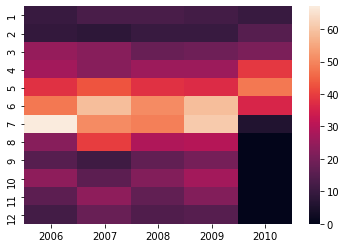

In [128]:
sns.heatmap(data=dataset)
plt.show()